# **1. Initial Data**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import datetime

In [4]:
df = pd.read_csv('/content/drive/My Drive/Analisis Big Data/positif_corona.csv')
df.head(10)

,Tanggal
0,3/2/2020
1,3/2/2020
2,3/6/2020
3,3/6/2020
4,3/8/2020
5,3/8/2020
6,3/9/2020
7,3/9/2020
8,3/9/2020
9,3/9/2020


# **2. Data Preprocessing**

In [5]:
# Menambah Kolom Baru(Berisikan Kasus Baru pada hari itu)
df = df.groupby(['Tanggal']).size().reset_index(name='Baru')

# Mengurutkan Data Sesuai Tanggal
df['Tanggal'] =pd.to_datetime(df.Tanggal)
df = df.sort_values('Tanggal', ignore_index=True)

# Menambah Kolom Positif(Berisi total seluruh kasus sampai hari itu)
df['Positif'] = df['Baru'].cumsum()

#Menjadikan Tanggal sebagai Index
df.set_index('Tanggal', inplace=True)

#Menambah kolom Hari (Berisikan hari ke 1, 2, dst)
new_col = np.arange(1, df.shape[0]+1)
df.insert(loc=0, column='Hari', value=new_col)
df.tail(10)

,Hari,Baru,Positif
Tanggal,,,
2020-04-19,44,327,6575
2020-04-20,45,185,6760
2020-04-21,46,375,7135
2020-04-22,47,283,7418
2020-04-23,48,357,7775
2020-04-24,49,436,8211
2020-04-25,50,396,8607
2020-04-26,51,275,8882
2020-04-27,52,214,9096


# **3. Data Understanding**

## Correlasi Data

In [6]:
print("Corr Hari and Positif\t\t:", df['Hari'].corr(df['Positif']))

Corr Hari and Positif		: 0.9477844237772807


## Ploting Data

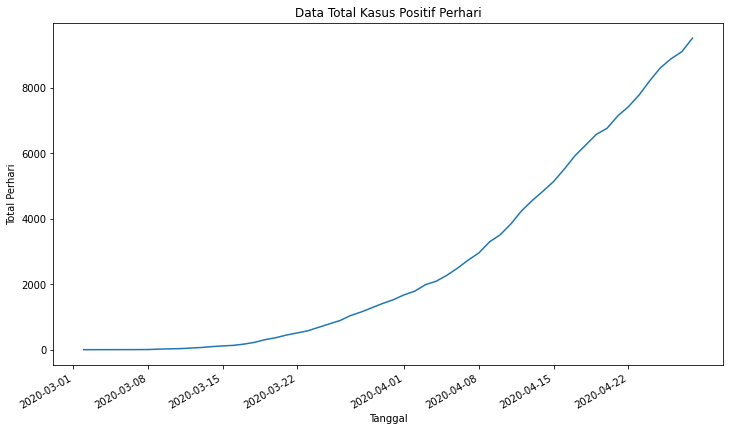

In [7]:
df['Positif'].plot(kind='line', stacked=False, figsize=(12, 7))
plt.ylabel('Total Perhari')
plt.title('Data Total Kasus Positif Perhari')
plt.show()

## Describe Data

In [8]:
df[['Positif']].describe()

,Positif
count,53.000000
mean,2962.377358
std,3000.750382
min,2.000000
25%,369.000000
50%,1790.000000
75%,5136.000000
max,9511.000000


In [9]:
df_pos = df[['Hari','Positif']]

display(df_pos.tail(5))

,Hari,Positif
Tanggal,,
2020-04-24,49,8211
2020-04-25,50,8607
2020-04-26,51,8882
2020-04-27,52,9096
2020-04-28,53,9511


# **4. Modelling**

![Regression](https://raw.githubusercontent.com/haris0/notebook_learning/master/assets/polynomial-regression.png)


## Polynomial Regression

Pada Polynomial Regression, yang akan menajadi Variable Independentnya adalaha data **Hari** sedangkan Variable dependentnya adalah data **Positif**

Fungsi Utama pada Polynomial Regression :

>$y = b_0 + b_1 x + b_2 x^2+...+b_nx^n$

In [0]:
x_1 = df_pos['Hari'].values.reshape(-1, 1)
y_1 = df_pos['Positif'].values

In [11]:
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(x_1)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_1)

print('Slope\t\t:',pol_reg.coef_)
print('Intercept\t:',pol_reg.intercept_)

df_pos.insert(loc=2, column='Pred', value=pol_reg.predict(poly_reg.fit_transform(x_1)))

display(df_pos.tail(5))

Slope		: [ 0.00000000e+00  6.41136268e+01 -5.22156744e+00  2.72204444e-01
 -2.47905154e-03]
Intercept	: -158.4444024140962


,Hari,Positif,Pred
Tanggal,,,
2020-04-24,49,8211,8179.481744
2020-04-25,50,8607,8524.801735
2020-04-26,51,8882,8866.963420
2020-04-27,52,9096,9204.595415
2020-04-28,53,9511,9536.266839


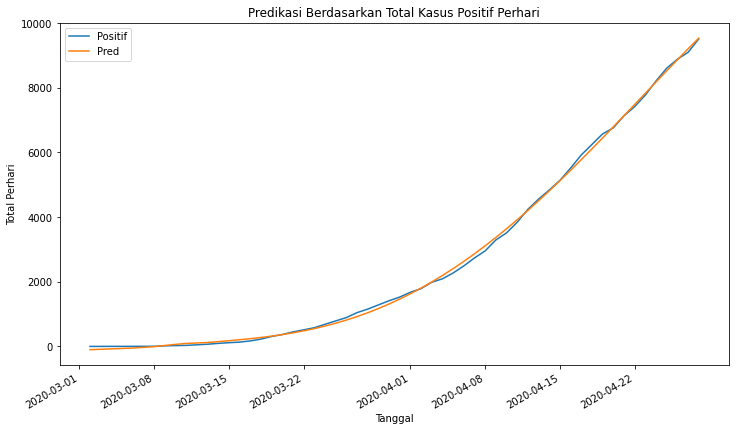

In [12]:
df_pos[['Positif', 'Pred']].plot(kind='line', stacked=False, figsize=(12, 7))
plt.ylabel('Total Perhari')
plt.title('Predikasi Berdasarkan Total Kasus Positif Perhari')
plt.show()

# **5. Evaluation**

*Mean Squared Error* (MSE)

> $ MSE = \frac{1}{n} \Sigma^n_{i=1} (y_i - y'_i)^2$

In [0]:
def get_mse(actual, predict, n):
  sigma_e_2 = 0
  for i in range(n):
    sigma_e_2 += (actual[i] - predict[i]) ** 2
  mse = sigma_e_2/n
  return mse

## Evaluasi Polynomial Regression 

In [14]:
print("Hasil Evaluasi\t:")
actual = df_pos['Positif'].values.tolist()
predict = df_pos['Pred'].values.tolist()
n = df_pos.shape[0]
print("MSE\t\t: ", get_mse(actual, predict, n))

Hasil Evaluasi	:
MSE		:  6155.162314966745


# **6. Summary**

## Prediksi 10 Hari Setelah Data Training Dengan **Polynomial Regression**

In [16]:
last_date = df_pos.index[52]
for x in range(54, 64): 
  predict = pol_reg.predict(poly_reg.fit_transform([[x]]))
  last_date += datetime.timedelta(days=1)
  print("Prediksi Kasus Positif ",last_date.strftime('%d-%m-%Y'),"\t: ", round(predict[0]))

Prediksi Kasus Positif  29-04-2020 	:  9860.0
Prediksi Kasus Positif  30-04-2020 	:  10176.0
Prediksi Kasus Positif  01-05-2020 	:  10480.0
Prediksi Kasus Positif  02-05-2020 	:  10773.0
Prediksi Kasus Positif  03-05-2020 	:  11051.0
Prediksi Kasus Positif  04-05-2020 	:  11313.0
Prediksi Kasus Positif  05-05-2020 	:  11558.0
Prediksi Kasus Positif  06-05-2020 	:  11784.0
Prediksi Kasus Positif  07-05-2020 	:  11988.0
Prediksi Kasus Positif  08-05-2020 	:  12168.0
